# [FMA: A Dataset For Music Analysis](https://github.com/mdeff/fma)

Michaël Defferrard, Kirell Benzi, Pierre Vandergheynst, Xavier Bresson, EPFL LTS2.

## Usage

1. Go through the [paper] to understand what the data is about.
1. Download some datasets from <https://github.com/mdeff/fma>.
1. Uncompress the archives, e.g. with `unzip fma_small.zip`.
1. Load and play with the data in this notebook.

[paper]: https://arxiv.org/abs/1612.01840

In [11]:
%matplotlib inline

import os
import json

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm

import utils

plt.rcParams['figure.figsize'] = (17, 5)

In [2]:
# Directory where mp3 are stored.
AUDIO_DIR = os.environ.get('AUDIO_DIR')

# Load metadata and features.
tracks = utils.load('fma_metadata/tracks.csv')
# genres = utils.load('fma_metadata/genres.csv')
# features = utils.load('fma_metadata/features.csv')
# echonest = utils.load('fma_metadata/echonest.csv')

tracks.shape

(106574, 52)

## 1 Metadata

The metadata table, a CSV file in the `fma_metadata.zip` archive, is composed of many colums:
1. The index is the ID of the song, taken from the website, used as the name of the audio file.
2. Per-track, per-album and per-artist metadata from the Free Music Archive website.
3. Two columns to indicate the subset (small, medium, large) and the split (training, validation, test).

In [3]:
ipd.display(tracks['track'].head())

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,256000,0,NaN,2008-11-26 01:48:14,2008-11-26,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
20,256000,0,NaN,2008-11-26 01:48:56,2008-01-01,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


### 1.1 Subsets

The small and medium subsets can be selected with the below code.

In [6]:
small = tracks[tracks['set', 'subset'] <= 'small']
small.shape

(8000, 52)

In [7]:
small = small['track'].reset_index(drop=False)
small = small.rename(columns={'genre_top': 'genre'})

In [8]:
small

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26,168,2,Hip-Hop,[21],...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26,206,6,Hip-Hop,[21],...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
2,10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26,161,178,Pop,[10],...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
3,140,128000,0,NaN,2008-11-26 01:44:07,2008-11-26,253,5,Folk,[17],...,NaN,1593,en,Attribution-Noncommercial-No Derivative Works ...,1299,NaN,2,NaN,[],Queen Of The Wires
4,141,128000,0,NaN,2008-11-26 01:44:10,2008-11-26,182,1,Folk,[17],...,NaN,839,en,Attribution-Noncommercial-No Derivative Works ...,725,NaN,4,NaN,[],Ohio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,154308,320000,0,NaN,2017-03-05 04:58:50,NaT,194,2,Hip-Hop,"[21, 539, 811]",...,NaN,3371,NaN,Attribution,2705,NaN,17,NaN,"[fleslit, trap beat free use, trap beat free d...",MIA
7996,154309,320000,0,NaN,2017-03-05 04:58:52,NaT,162,5,Hip-Hop,"[21, 539, 811]",...,NaN,4525,NaN,Attribution,3589,NaN,18,NaN,"[fleslit, trap beat free use, trap beat free d...",A1 Symphony
7997,154413,320000,0,NaN,2017-03-07 18:46:39,NaT,349,0,Pop,[76],...,NaN,809,NaN,Creative Commons Attribution-NonCommercial-NoD...,676,NaN,9,NaN,[],Do Easy
7998,154414,320000,0,NaN,2017-03-07 18:46:41,NaT,346,1,Pop,[76],...,NaN,851,NaN,Creative Commons Attribution-NonCommercial-NoD...,788,NaN,10,NaN,[],Dead Can Dance (uncensored)


In [9]:
min_duration = small['track', 'duration'].min()
max_duration = small['track', 'duration'].max()
avg_duration = small['track', 'duration'].mean()

print(f"Minimum duration: {min_duration}")
print(f"Maximum duration: {max_duration}")
print(f"Average duration: {avg_duration}")

Minimum duration: 60
Maximum duration: 600
Average duration: 228.8415


In [5]:
medium = tracks[tracks['set', 'subset'] <= 'medium']
medium.shape

(25000, 52)

In [10]:
# Create a dictionary where keys are top-level genres and values are lists of track IDs
genre_track_dict = small.groupby(('track', 'genre_top')).apply(lambda x: x.index.tolist()).to_dict()

# Drop the genres that have no tracks
genre_track_dict = {k: v for k, v in genre_track_dict.items() if len(v) > 0}

for genre, track_ids in genre_track_dict.items():
    print(f"{genre}: {len(track_ids)}")

# save to json
import json

with open('genre_track_dict.json', 'w') as f:
    json.dump(genre_track_dict, f) 
    f.close()


KeyError: ('track', 'genre_top')

In [16]:
import json

# Load the genre_track_dict from the training JSON file
with open('fma_metadata/train/genre_track_dict.json', 'r') as f:
    genre_track_dict = json.load(f)

# Create the validation set
validation_set = {}
for genre, track_ids in genre_track_dict.items():
    validation_set[genre] = track_ids[:100]
    # Remove the selected IDs from the training set
    genre_track_dict[genre] = track_ids[100:]

# Print the validation set
for genre, track_ids in validation_set.items():
    print(f"{genre}: {len(track_ids)} tracks")

# Save the validation set to a JSON file
with open('fma_metadata/val/genre_track_dict.json', 'w') as f:
    json.dump(validation_set, f)

# Save the updated training set to the JSON file
with open('fma_metadata/train/genre_track_dict.json', 'w') as f:
    json.dump(genre_track_dict, f)

Electronic: 100 tracks
Experimental: 100 tracks
Folk: 100 tracks
Hip-Hop: 100 tracks
Instrumental: 100 tracks
International: 100 tracks
Pop: 100 tracks
Rock: 100 tracks


In [34]:
print("Training set:")
with open('fma_metadata/train/genre_track_dict.json', 'r') as f:
    genre_track_dict = json.load(f)
    for bin, ids in genre_track_dict.items():
        print(f"{bin}: {len(ids)}")

print("Validation set:")
with open('fma_metadata/val/genre_track_dict.json', 'r') as f:
    genre_track_dict = json.load(f)
    for bin, ids in genre_track_dict.items():
        print(f"{bin}: {len(ids)}")

Training set:
Electronic: 899
Experimental: 899
Folk: 900
Hip-Hop: 900
Instrumental: 900
International: 900
Pop: 900
Rock: 899
Validation set:
Electronic: 100
Experimental: 100
Folk: 100
Hip-Hop: 100
Instrumental: 100
International: 100
Pop: 100
Rock: 100


In [17]:
# Combine the train and validation sets into a single dictionary
combined_dict = {
    "train": [track_id for track_ids in genre_track_dict.values() for track_id in track_ids],
    "val": [track_id for track_ids in validation_set.values() for track_id in track_ids]
}

# Save the combined dictionary to a JSON file
with open('train_val_ids.json', 'w') as f:
    json.dump(combined_dict, f)

In [18]:
len(combined_dict['train']), len(combined_dict['val'])

(7197, 800)

In [19]:
import json

# Load the interest_bin_dict from the JSON file
with open('fma_metadata/train/interest_bin_dict.json', 'r') as f:
    interest_bin_dict = json.load(f)

val_interest_bin_dict = {}
train_interest_bin_dict = {}

# Remove the IDs that are in the validation set
for bin, ids in interest_bin_dict.items():
    val_interest_bin_dict[bin] = [id for id in ids if id in combined_dict['val']]
    train_interest_bin_dict[bin] = [id for id in ids if id in combined_dict['train']]

# Save the updated interest_bin_dict to the JSON file
with open('fma_metadata/val/interest_bin_dict.json', 'w') as f:
    json.dump(val_interest_bin_dict, f)

with open('fma_metadata/train/interest_bin_dict.json', 'w') as f:
    json.dump(train_interest_bin_dict, f)

In [24]:
print("Training set:")
with open('fma_metadata/train/interest_bin_dict.json', 'r') as f:
    interest_bin_dict = json.load(f)
    for bin, ids in interest_bin_dict.items():
        print(f"{bin}: {len(ids)}")

print("Validation set:")
with open('fma_metadata/val/interest_bin_dict.json', 'r') as f:
    interest_bin_dict = json.load(f)
    for bin, ids in interest_bin_dict.items():
        print(f"{bin}: {len(ids)}")

Training set:
0-2000: 2023
2000-5000: 2577
5000-10000: 1585
10000+: 1012
Validation set:
0-2000: 146
2000-5000: 318
5000-10000: 207
10000+: 129


In [25]:
import json

# Load the year_created_dict from the JSON file
with open('fma_metadata/train/year_created_bin_dict.json', 'r') as f:
    year_created_dict = json.load(f)

val_year_created_dict = {}
train_year_created_dict = {}

# Remove the IDs that are in the validation set
for bin, ids in year_created_dict.items():
    val_year_created_dict[bin] = [id for id in ids if id in combined_dict['val']]
    train_year_created_dict[bin] = [id for id in ids if id in combined_dict['train']]

# Save the updated year_created_dict to the JSON file
with open('fma_metadata/val/year_created_bin_dict.json', 'w') as f:
    json.dump(val_year_created_dict, f)

with open('fma_metadata/train/year_created_bin_dict.json', 'w') as f:
    json.dump(train_year_created_dict, f)

In [32]:
print("Training set:")
with open('fma_metadata/train/year_created_bin_dict.json', 'r') as f:
    year_created_dict = json.load(f)
    for bin, ids in year_created_dict.items():
        print(f"{bin}: {len(ids)}")

print("Validation set:")
with open('fma_metadata/val/year_created_bin_dict.json', 'r') as f:
    year_created_dict = json.load(f)
    for bin, ids in year_created_dict.items():
        print(f"{bin}: {len(ids)}")

Training set:
2008-2012: 2607
2013-2017: 4590
Validation set:
2008-2012: 790
2013-2017: 10


In [22]:
# Define the bins for interest
bins = [0, 2000, 5000, 10000, float('inf')]
labels = ['0-2000', '2000-5000', '5000-10000', '10000+']

# Bin the interest values
small['track', 'interest_bin'] = pd.cut(small['interest'], bins=bins, labels=labels, right=False)

# Create a dictionary where each key is an interest bin and values are list of track ids in that bin
interest_bin_dict = small.groupby(('track', 'interest_bin')).apply(lambda x: x.index.tolist()).to_dict()

# Print the dictionary
for bin_label, track_ids in interest_bin_dict.items():
    print(f"{bin_label}: {len(track_ids)} tracks")

# save to json
# with open('interest_bin_dict.json', 'w') as f:
#     json.dump(interest_bin_dict, f) 
#     f.close()

0-2000: 2169 tracks
2000-5000: 2896 tracks
5000-10000: 1794 tracks
10000+: 1141 tracks


C:\Users\sabbi\AppData\Local\Temp\ipykernel_21704\339829924.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interest_bin_dict = small.groupby(('track', 'interest_bin')).apply(lambda x: x.index.tolist()).to_dict()


In [27]:
# count Nan values in date_recorded column
small['date_created'].isna().sum()

0

In [28]:
# Extract the year from the 'date_recorded' column and create a new column 'year_recorded'
small['year_created'] = small['date_created'].dt.year

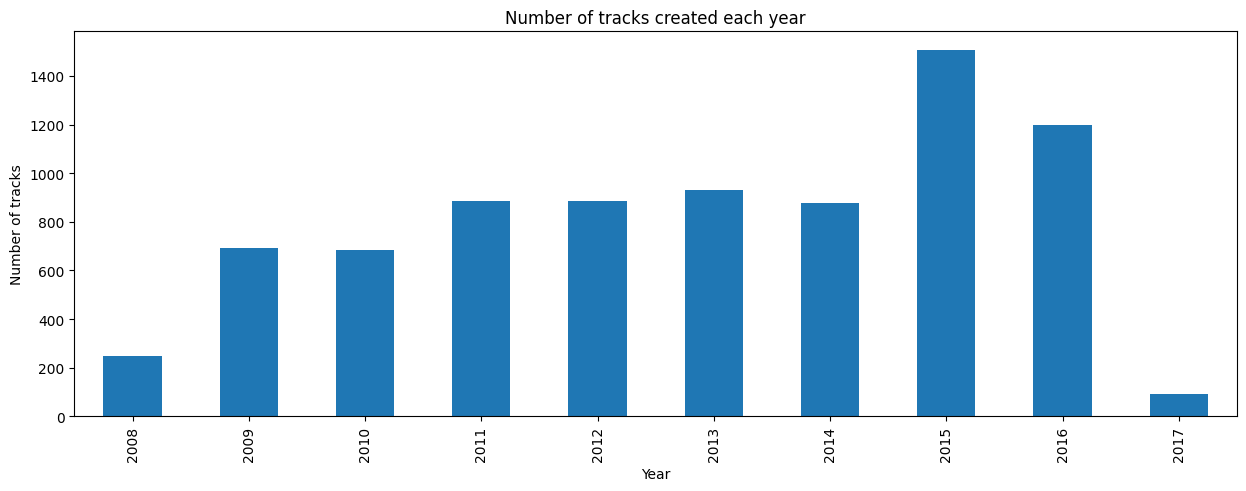

In [29]:
# plot the number of tracks created each year
plt.figure(figsize=(15, 5))
small['year_created'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of tracks created each year')
plt.xlabel('Year')
plt.ylabel('Number of tracks')
plt.show()


In [30]:
# Define the bins for interest
bins = [2007, 2013, 2018]
labels = ['2008-2012', '2013-2017']

# Bin the interest values
small['year_created_bin'] = pd.cut(small['year_created'], bins=bins, labels=labels, right=False)

# Create a dictionary where each key is an interest bin and values are list of track ids in that bin
year_created_bin_dict = small.groupby(('year_created_bin')).apply(lambda x: x.index.tolist()).to_dict()

# Print the dictionary
for bin_label, track_ids in year_created_bin_dict.items():
    print(f"{bin_label}: {len(track_ids)} tracks")


2008-2012: 3397 tracks
2013-2017: 4603 tracks


C:\Users\sabbi\AppData\Local\Temp\ipykernel_21704\2731615662.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_created_bin_dict = small.groupby(('year_created_bin')).apply(lambda x: x.index.tolist()).to_dict()


 Generate Small CSV

In [26]:
small = tracks[tracks['set', 'subset'] <= 'small'].copy()
small = small['track'].reset_index(drop=False)
small['year_created'] = small['date_created'].dt.year
small = small.rename(columns={'genre_top': 'genre'})
small = small[~small['track_id'].isin([133297, 99134, 108925])] # remove corrupted tracks
# keep only track_id, genre, year_created, and interest columns
small = small[['track_id', 'genre', 'year_created', 'interest']]

In [28]:
# save to csv
small.to_csv('fma_metadata/small.csv', index=False)

In [29]:
# load the small dataset
small = pd.read_csv('fma_metadata/small.csv')

Split to train and val

In [32]:
train_val_ids = json.load(open('fma_metadata/train_val_ids.json'))

In [35]:
# create small_train.csv and small_val.csv
small_train = small[small['track_id'].isin(train_val_ids['train'])]
small_val = small[small['track_id'].isin(train_val_ids['val'])]

# save to csv
small_train.to_csv('fma_metadata/train/small.csv', index=False)
small_val.to_csv('fma_metadata/val/small.csv', index=False)

Some sanity checks:

In [18]:
# check that tracks in genre_track_dict are in the correct genre bin
genre_track_dict = json.load(open('fma_metadata/train/genre_track_dict.json'))

for genre, track_ids in genre_track_dict.items():
    for track_id in track_ids:
        assert small.loc[small['track_id'] == track_id, 'genre'].values[0] == genre
